## 指定のディレクトリからデータを読みだして学習に掛ける

In [1]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K

Using TensorFlow backend.


In [2]:
with open("./t_fal_audio_data/np_data.dat", mode="rb") as f:
    data=np.fromfile(f,dtype=float)

### データは1配列で返されるので書き込み時の状態に変換する

In [3]:
size=2**12 #サンプリングのデータサイズを入力
n=int(len(data)/(size+1))

data=data.reshape((n, size+1))

print(type(data))
print(len(data))
print(len(data[0]))
print(data[0])

<class 'numpy.ndarray'>
40
4097
[0.214      0.11075341 0.15259981 ... 0.02155629 0.05022515 0.15259981]


In [4]:
temp_data=np.array([])
sound_data=np.array([])
for i in range(len(data)):
    temp_data=np.append(temp_data, data[i][0].real)
    sound_data=np.append(sound_data, data[i][1:])

sound_data=sound_data.reshape((n,size))

"""
temp_data:測定温度の配列(float)
sound_data:音声スペクトルデータの2次元配列([[complex]...[]])
"""

    
print(len(sound_data[0]))
print(temp_data)
print(type(temp_data[0]))

4096
[0.214 0.24  0.265 0.345 0.308 0.346 0.33  0.34  0.42  0.38  0.431 0.423
 0.482 0.479 0.501 0.503 0.513 0.579 0.55  0.567 0.592 0.689 0.636 0.661
 0.671 0.69  0.718 0.759 0.75  0.775 0.856 0.795 0.831 0.833 0.861 0.91
 0.886 0.92  0.942 0.94 ]
<class 'numpy.float64'>


<font size=5 color="red">予測データの用意</font>

In [5]:
with open("./t_fal_audio_data/np_prediction_data.dat", mode="rb") as f:
    prediction_data=np.fromfile(f,dtype=float)

prediction_data=prediction_data.reshape((10,4097))

prediciton_temp_data=np.array([])
prediciton_sound_data=np.array([])
for i in range(len(prediction_data)):
    prediciton_temp_data=np.append(prediciton_temp_data, prediction_data[i][0])
    prediciton_sound_data=np.append(prediciton_sound_data, prediction_data[i][1:])
    
prediciton_sound_data=prediciton_sound_data.reshape((10,4096))

print(prediciton_temp_data)
print(prediciton_sound_data)

[33.  42.2 49.8 60.5 67.  70.5 75.9 82.1 85.8 91.7]
[[0.07170207 0.08974837 0.0852675  ... 0.07528725 0.0852675  0.08974837]
 [0.081953   0.09420389 0.10618163 ... 0.0246869  0.10618163 0.09420389]
 [0.17753448 0.0796667  0.05342869 ... 0.11737094 0.05342869 0.0796667 ]
 ...
 [0.01008851 0.07105503 0.08758143 ... 0.03424141 0.08758143 0.07105503]
 [0.11010878 0.07297494 0.02128973 ... 0.03864819 0.02128973 0.07297494]
 [0.03787634 0.02785253 0.10334471 ... 0.37592443 0.10334471 0.02785253]]


# TFのkerasで学習装置を実装してみる

In [6]:
model=keras.Sequential([
    keras.layers.Dense(4096, activation=tf.nn.relu, input_dim=4096),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.relu),
    keras.layers.Dense(1)
])

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
#optimizer = tf.train.RMSPropOptimizer(0.5)
optimizer = keras.optimizers.Adadelta()

def abs_percent(y_ture, y_pred):
    return 1-abs((y_pred-y_ture)/y_ture)

"""
model.compile(loss='mse',
            optimizer=optimizer,
            metrics=[abs_percent])
"""
model.compile(loss='mse',
            optimizer=optimizer)

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dense_2 (Dense)              (None, 512)               2097664   
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 18,945,941
Trainable params: 18,945,941
Non-trainable params: 0
_________________________________________________________________
None


Instructions for updating:
Use tf.cast instead.
Epoch 1/50
40/40 [==============================] - 2s 39ms/step - loss: 1.1592
Epoch 2/50
40/40 [==============================] - 1s 15ms/step - loss: 0.2495
Epoch 3/50
40/40 [==============================] - 1s 15ms/step - loss: 0.0747
Epoch 4/50
40/40 [==============================] - 1s 16ms/step - loss: 0.0481
Epoch 5/50
40/40 [==============================] - 1s 15ms/step - loss: 0.0365
Epoch 6/50
40/40 [==============================] - 1s 16ms/step - loss: 0.0539
Epoch 7/50
40/40 [==============================] - 1s 16ms/step - loss: 0.0444
Epoch 8/50
40/40 [==============================] - 1s 16ms/step - loss: 0.0270
Epoch 9/50
40/40 [==============================] - 1s 15ms/step - loss: 0.0488
Epoch 10/50
40/40 [==============================] - 1s 15ms/step - loss: 0.0413
Epoch 11/50
40/40 [==============================] - 1s 15ms/step - loss: 0.0236
Epoch 12/50
40/40 [==============================] - 1s 15ms/step - lo

KeyError: 'abs_percent'

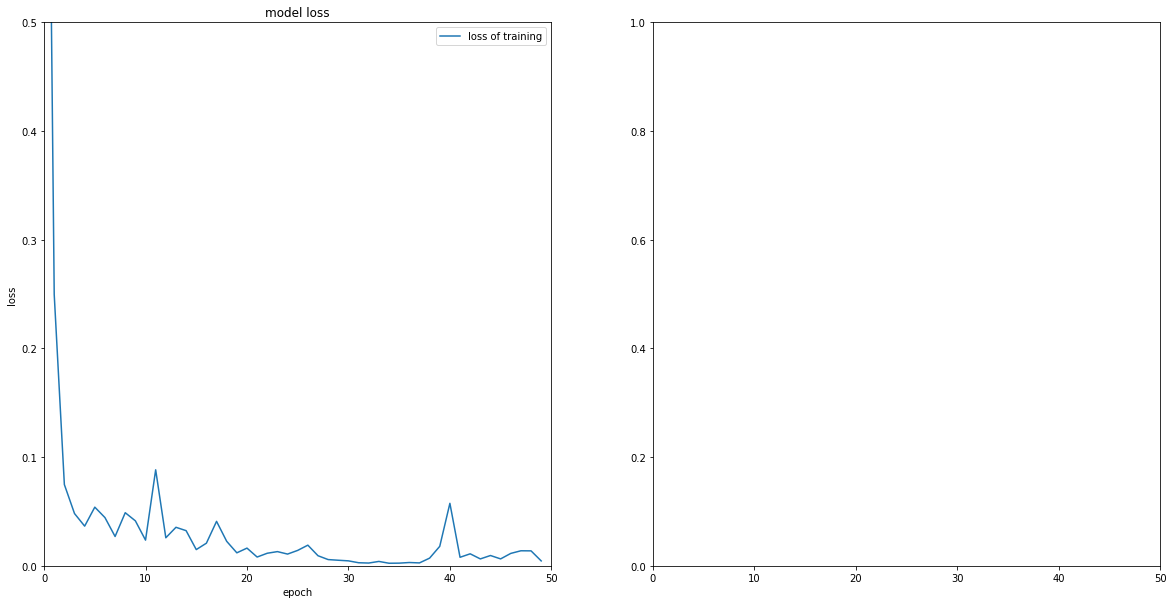

In [9]:
epochs=50

fit=model.fit(sound_data, temp_data, epochs=epochs, callbacks=None, validation_split=0)


plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
plt.xlim(0,epochs)
plt.ylim(0, 0.5)
plt.plot(fit.history['loss'], label="loss of training")
try:
    plt.plot(fit.history['val_loss'], label="loss of validation")
except:
    pass
plt.title("model loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.xlim(0,epochs)
plt.ylim(0, 1)
plt.plot(fit.history['abs_percent'], label="acc of training")
try:
    plt.plot(fit.history['val_abs_percent'], label="acc of validation")
except:
    pass
plt.title("model accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()

plt.show()http://localhost:8888/notebooks/Git_repository/measure_temp_Tfal/data_analysis_by_keras_Sequential.ipynb

In [10]:
test_loss, test_acc = model.evaluate(sound_data, temp_data)

print("Test_loss:", test_loss)
print("Test_accuracy:", test_acc)

40/40 [==============================] - 0s 2ms/step


TypeError: 'numpy.float64' object is not iterable

In [11]:
test_loss, test_acc = model.evaluate(prediciton_sound_data, prediciton_temp_data)

print("Test_loss:", test_loss)
print("Test_accuracy:", test_acc)

10/10 [==============================] - 0s 2ms/step


TypeError: 'numpy.float64' object is not iterable

## モデルで予想をしてみる

In [12]:
pre_temp=model.predict(sound_data)

print(type(pre_temp))

error=np.array([])
error_abs=np.array([])
for i in range(len(temp_data)):
    error=np.append(error, (pre_temp[i]-temp_data[i])/temp_data[i]*100)
    error_abs=np.append(error_abs, abs((pre_temp[i]-temp_data[i])/temp_data[i]*100))

np.set_printoptions(precision=2, suppress=True)
print(error)
print(error_abs)
print("error average is {:.2g} %".format(np.mean(error)))
print("error absolute average is {:.2g} %".format(np.mean(error_abs)))

<class 'numpy.ndarray'>
[36.6   3.35 14.46 -1.39 11.34 -5.29  6.69  7.26 -1.3  25.03 15.82 19.11
  5.69 14.16 18.5   6.85  6.94  2.91  0.48  1.31 12.63 10.17 10.58  0.75
  9.23 15.23  7.65  8.86  0.45 -2.2   3.6  13.98  5.74  0.12  6.49  8.73
  8.61 -9.96 -0.22 -6.01]
[36.6   3.35 14.46  1.39 11.34  5.29  6.69  7.26  1.3  25.03 15.82 19.11
  5.69 14.16 18.5   6.85  6.94  2.91  0.48  1.31 12.63 10.17 10.58  0.75
  9.23 15.23  7.65  8.86  0.45  2.2   3.6  13.98  5.74  0.12  6.49  8.73
  8.61  9.96  0.22  6.01]
error average is 7.3 %
error absolute average is 8.6 %


In [13]:
pre_test_temp=model.predict(prediciton_sound_data)*100

test_error=np.array([])
test_error_abs=np.array([])
for i in range(len(prediciton_temp_data)):
    test_error=np.append(test_error, (pre_test_temp[i]-prediciton_temp_data[i])/prediciton_temp_data[i]*100)
    test_error_abs=np.append(test_error_abs, abs((pre_test_temp[i]-prediciton_temp_data[i])/prediciton_temp_data[i]*100))
    
print(test_error)
print("test error average is {:.2g} %".format(np.mean(test_error)))
print("absolute test error average is {:.2g} %".format(np.mean(test_error_abs)))

print(pre_test_temp)
print(prediciton_temp_data)

[ -7.84  41.27  25.81   5.1    6.42 -18.39 -28.58  10.27 -15.87 -11.97]
test error average is 0.62 %
absolute test error average is 17 %
[[30.41]
 [59.61]
 [62.65]
 [63.58]
 [71.3 ]
 [57.54]
 [54.21]
 [90.53]
 [72.18]
 [80.73]]
[33.  42.2 49.8 60.5 67.  70.5 75.9 82.1 85.8 91.7]


In [14]:
print(pre_temp*100)

[[29.23]
 [24.8 ]
 [30.33]
 [34.02]
 [34.29]
 [32.77]
 [35.21]
 [36.47]
 [41.45]
 [47.51]
 [49.92]
 [50.38]
 [50.94]
 [54.68]
 [59.37]
 [53.75]
 [54.86]
 [59.59]
 [55.26]
 [57.44]
 [66.68]
 [75.91]
 [70.33]
 [66.59]
 [73.29]
 [79.51]
 [77.3 ]
 [82.63]
 [75.34]
 [75.8 ]
 [88.68]
 [90.61]
 [87.87]
 [83.4 ]
 [91.69]
 [98.94]
 [96.23]
 [82.84]
 [93.99]
 [88.35]]


### 過学習はなさそう。その代わり、どうしても解析できない部分の温度帯がある。
---
ともあれ、これが現状で一番のモデルであるので保存してリアルタイムの温度測定に用いてみる。
過学習の検証はそこで同時に行える。

In [15]:
model.save("./model")